# **CUSTOMER SATISFACTION CLUSTERING**

### **By : Delvin Jong**

## Business Problem Understanding

### **Context**

Pada tahun 2010-an, ada banyak bisnis berbasis teknologi. Hal ini terjadi tidak hanya di Indonesia saja, tapi di negara-negara lain di dunia. Salah satunya adalah Brazil, negara yang terdapat di Amerika Selatan. Hingga saat ini, salah satu *ecommerce* yang terbesar di Brazil adalah Olist. Olist dapat menghubungkan bisnis-bisnis kecil dalam satu *ecommerce* dengan menawarkan kemudahan dalam melakukan proses registrasi. setelah merchant-merchant tersebut terdaftar, mereka dapat langsung melakukan penjualan dan pengirimannya dapat dibantu dengan *logistic partners* dari Olist.  

Olist merupakan salah satu perusahaan yang menerapkan *data driven mindset*. Olist ingin berfokus untuk memberikan layanan yang terbaik bagi customer mereka. Tim *research and development* (RnD) dari Olist meminta bantuan dari tim *data science* untuk melihat *customer satisfaction*. Tim SAM berharap dengan mereka mengetahui ciri-ciri seorang konsumen tidak puas menggunakan apps atau layanan yang ada di Olist maka mereka dapat memperbaiki hal-hal tersebut dan meningkatkan *customer satisfaction* di masa depan. Sehingga, Olist dapat memberikan layanan yang semakin baik untuk semua konsumennya.

### **Problem Statement**

Dengan banyaknya konsumen yang memutuskan untuk berbelanja melalui Olist, dapat dilihat bahwa adanya konsumen yang puas dan tidak puas dengan layanan atau fitur yang diberikan oleh Olist. Dan dengan berfokus pada ketidakpuasan konsumen terhadap Olist, maka Olist dapat meningkatkan *customer service* mereka. 

### **Goals**

Tujuan dengan adanya *clustering* berdasarkan *customer* yang *unsatisfied* agar Olist dapat memberikan peningkatan layanan yang sesuai terhadap setiap kelompok *cluster*.

### **Analytical Approach**

Untuk dapat mengetahui ciri-ciri pelanggan berdasarkan tingkat kepuasan, maka dapat dilakukan analisa sebagai berikut :

- Dengan melakukan *Exploratory Data Analysis* (EDA) kita dapat melihat feature yang berhubungan dengan *customer satisfaction*
- Melakukan clustering pada customer yang unsatisfied terhadap layanan Olist

### **Metric Evaluation**

Untuk mengevaluasi hasil *clustering*, kita dapat melihatnya dengan *metrics* :
- Silhouette score

### **Data Understanding**

In [930]:
# Import Basic Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [931]:
# Import Datasets
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [932]:
# Display all datasets
display(customers.head(3))
display(payments.head(3))
display(items.head(3))
display(orders.head(3))
display(reviews.head(3))
display(geolocation.head(3))
display(products.head(3))
display(sellers.head(3))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [933]:
# Display all datasets shape
display(customers.shape)
display(payments.shape)
display(items.shape)
display(orders.shape)
display(reviews.shape)
display(geolocation.shape)
display(products.shape)
display(sellers.shape)

(99441, 5)

(103886, 5)

(112650, 7)

(99441, 8)

(99224, 7)

(1000163, 5)

(32951, 9)

(3095, 4)

Selanjutnya, saya akan menggabungkan dataframes ini menjadi satu dataframe.

In [934]:
# Merge items and payments dataframe on order_id
df_all = pd.merge(items, payments, how="left", on="order_id")

In [935]:
# Merge df_all and orders dataframe on order_id
df_all = pd.merge(df_all, orders, how="left", on="order_id")

In [936]:
# Merge df_all and reviews dataframe on order_id
df_all = pd.merge(df_all, reviews, how="left", on="order_id")

In [937]:
# Merge df_all and customers dataframe on customer_id
df_all = pd.merge(df_all, customers, how="left", on="customer_id")

In [938]:
# Merge df_all and products datadrame on zip_code_prefix
df_all = pd.merge(df_all, products, how="left", on="product_id")

In [939]:
# Merge df_all and sellers dataframe on seller_id
df_all = pd.merge(df_all, sellers, how="left", on="seller_id")

In [940]:
# Merge result
df_all

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1206,sao paulo,SP
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,43.0,869.0,1.0,967.0,21.0,24.0,19.0,80610,curitiba,PR
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,4733,sao paulo,SP


Hasil dari merge datasets ini adalah sebuah dataframe yang terdiri atas 118310 baris dan 39 kolom. 

In [941]:
# Columns information
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   payment_sequential             118307 non-null  float64
 8   payment_type                   118307 non-null  object 
 9   payment_installments           118307 non-null  float64
 10  payment_value                  118307 non-null  float64
 11  customer_id                    118310 non-null  object 
 12  order_status                  

In [942]:
df_all.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

Ada banyak kolom yang memiliki missing values dan mempunyai dtypes yang kurang tepat dalam dataframe ini.

1. Missing Values : 'payment_type', 'payment_installments', 'payment_value', 'order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message','review_creation_date', 'review_answer_timestamp', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'.

2. Dtypes yang kurang tepat : 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date' 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_answer_timestamp'.

### **Data Cleaning**

In [961]:
# Make a copy of df_all
df_clean = df_all.copy()
df_clean

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1206,sao paulo,SP
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,43.0,869.0,1.0,967.0,21.0,24.0,19.0,80610,curitiba,PR
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,4733,sao paulo,SP


In [944]:
# Checking missing values on df
df_clean.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
review_id                           978
review_score                        978
review_comment_title             104418
review_comment_message            68628
review_creation_date                978
review_answer_timestamp             978
customer_unique_id                    0


In [962]:
# Drop columns that's not relevant for EDA or modeling
df_clean.drop(columns=['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp',
                     'order_item_id','seller_id', 'shipping_limit_date', 'payment_sequential', 'product_weight_g', 'order_approved_at',
                     'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name', 'product_name_lenght',
                     'product_description_lenght', 'product_photos_qty', 'order_delivered_carrier_date'], inplace=True)

In [963]:
df_clean.isnull().sum()

order_id                            0
product_id                          0
price                               0
freight_value                       0
payment_type                        3
payment_installments                3
payment_value                       3
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2588
order_estimated_delivery_date       0
review_score                      978
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
dtype: int64

In [964]:
# See the percentage of null value in each columns
((df_clean.isnull().sum())/len(df_clean))*100

order_id                         0.000000
product_id                       0.000000
price                            0.000000
freight_value                    0.000000
payment_type                     0.002536
payment_installments             0.002536
payment_value                    0.002536
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    2.187474
order_estimated_delivery_date    0.000000
review_score                     0.826642
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000
dtype: float64

Missing value dengan persentase terbesar ada di kolom order_delivered_customer_date sebanyak 2%. Dengan melihat jumlah missing value ini, saya akan drop semua missing valuenya.

In [965]:
# Droping missing values by certain columns
df_clean.dropna(subset=['payment_type', 'payment_installments', 'payment_value', 'order_delivered_customer_date',
                      'review_score'], inplace=True)

In [966]:
# Reset index of df_all
df_clean.reset_index(inplace=True)

In [967]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114858 entries, 0 to 114857
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          114858 non-null  int64  
 1   order_id                       114858 non-null  object 
 2   product_id                     114858 non-null  object 
 3   price                          114858 non-null  float64
 4   freight_value                  114858 non-null  float64
 5   payment_type                   114858 non-null  object 
 6   payment_installments           114858 non-null  float64
 7   payment_value                  114858 non-null  float64
 8   customer_id                    114858 non-null  object 
 9   order_status                   114858 non-null  object 
 10  order_purchase_timestamp       114858 non-null  object 
 11  order_delivered_customer_date  114858 non-null  object 
 12  order_estimated_delivery_date 

In [968]:
# Change dtypes to the correct ones
df_clean['order_purchase_timestamp'] = pd.to_datetime(df_clean['order_purchase_timestamp'], format='%Y-%m-%d')
df_clean['order_delivered_customer_date'] = pd.to_datetime(df_clean['order_delivered_customer_date'], format='%Y-%m-%d')
df_clean['order_estimated_delivery_date'] = pd.to_datetime(df_clean['order_estimated_delivery_date'], format='%Y-%m-%d')

In [969]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114858 entries, 0 to 114857
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          114858 non-null  int64         
 1   order_id                       114858 non-null  object        
 2   product_id                     114858 non-null  object        
 3   price                          114858 non-null  float64       
 4   freight_value                  114858 non-null  float64       
 5   payment_type                   114858 non-null  object        
 6   payment_installments           114858 non-null  float64       
 7   payment_value                  114858 non-null  float64       
 8   customer_id                    114858 non-null  object        
 9   order_status                   114858 non-null  object        
 10  order_purchase_timestamp       114858 non-null  datetime64[ns]
 11  

In [970]:
# Drop the index columns
df_clean.drop(columns='index', inplace=True)

In [954]:
# Final DataFrame
df_clean

,order_id,product_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114853,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,boleto,1.0,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2017-11-30 10:04:05,NaT,2017-12-22,5.0,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,88303,itajai,SC
114854,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,boleto,1.0,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2017-11-30 10:04:05,NaT,2017-12-22,5.0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1206,sao paulo,SP
114855,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,credit_card,3.0,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2018-05-12 16:55:49,2018-05-17 12:17:30,2018-05-30,5.0,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR
114856,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,credit_card,3.0,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2018-05-30 09:21:06,2018-06-13 22:48:47,2018-07-05,5.0,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,4733,sao paulo,SP


In [958]:
df_clean.isnull().sum()

order_id                            0
product_id                          0
price                               0
freight_value                       0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2498
order_estimated_delivery_date       0
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
dtype: int64

### **Exploratory Data Analysis**

##### Dengan melihat dataframe df_all maka dapat disimpulkan bahwa ada banyak orang yang tidak menuliskan review setelah membeli barang

In [974]:
df_all

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1206,sao paulo,SP
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,43.0,869.0,1.0,967.0,21.0,24.0,19.0,80610,curitiba,PR
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,4733,sao paulo,SP


In [1042]:
((df_all['review_comment_message'].isnull().sum())/(len(df_all)))*100

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state


In [980]:
((df_all['review_comment_title'].isnull().sum())/(len(df_all)))*100

88.25796635956385

Ada 58% orang yang membeli barang di Olist dan tidak meninggalkan review comment messages, dan 88% dari total konsumen tidak meninggalkan review comment title juga pada kolom komentar.

In [971]:
df_clean

,order_id,product_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114853,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,boleto,1.0,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18,5.0,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,88303,itajai,SC
114854,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,boleto,1.0,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01,5.0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1206,sao paulo,SP
114855,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,credit_card,3.0,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10,5.0,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR
114856,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,credit_card,3.0,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25,5.0,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,4733,sao paulo,SP


In [973]:
# Split datetime into several columns
df_clean['order_purchase_day'] = pd.to_datetime(df_clean['order_purchase_timestamp']).dt.day
df_clean['order_purchase_hour'] = pd.to_datetime(df_clean['order_purchase_timestamp']).dt.hour

df_clean['order_delivered_day'] = pd.to_datetime(df_clean['order_delivered_customer_date']).dt.day
df_clean['order_delivered_hour'] = pd.to_datetime(df_clean['order_delivered_customer_date']).dt.hour

In [972]:
# Make new columns/features to analyze
df_clean['delivery_time'] = (df_clean['order_delivered_customer_date'] - df_clean['order_purchase_timestamp']).dt.days
df_clean['est_delivery_time'] = (df_clean['order_estimated_delivery_date'] - df_clean['order_purchase_timestamp']).dt.days
df_clean['est_real_delivery_time'] = df_clean['est_delivery_time'] - df_clean['delivery_time']

In [990]:
((df_clean[df_clean['est_real_delivery_time'] <=0].shape[0])/(len(df_clean)))*100

8.561876403907434

Dengan logistic partners yang bekerja sama dengan Olist, hanya ada **8.56%** pesanan yang mengalami keterlambatan dari total 114.858 orders.

In [994]:
(df_clean['payment_type'].value_counts(normalize=True))*100

credit_card    73.771091
boleto         19.447492
voucher         5.341378
debit_card      1.440039
Name: payment_type, dtype: float64

Metode pembayaran yang paling banyak dilakukan adalah dengan credit card, dengan persentase **73%**. Dan metode pembayaran yang paling sedikit penggunanya adalah debit card dengan 1.44%.

### **Data Preprocessing**

Sebelum melakukan clustering, saya akan drop beberapa kolom yang kurang relevan untuk modeling.

In [ ]:
# Copy df_all for modeling
df = df_all.copy()
df

,order_id,product_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114853,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,boleto,1.0,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,5.0,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,88303,itajai,SC
114854,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,boleto,1.0,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,5.0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1206,sao paulo,SP
114855,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,credit_card,3.0,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,5.0,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR
114856,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,credit_card,3.0,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,5.0,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,4733,sao paulo,SP


In [ ]:
# See information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114858 entries, 0 to 114857
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114858 non-null  object 
 1   product_id                     114858 non-null  object 
 2   price                          114858 non-null  float64
 3   freight_value                  114858 non-null  float64
 4   payment_type                   114858 non-null  object 
 5   payment_installments           114858 non-null  float64
 6   payment_value                  114858 non-null  float64
 7   customer_id                    114858 non-null  object 
 8   order_status                   114858 non-null  object 
 9   order_purchase_timestamp       114858 non-null  object 
 10  order_delivered_customer_date  114858 non-null  object 
 11  order_estimated_delivery_date  114858 non-null  object 
 12  review_score                  

In [ ]:
# Drop columns for modeling
df.drop(columns=['order_id', 'product_id', 'payment_type', 'payment_installments', 'customer_id', 'order_status',
       'order_purchase_timestamp','order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_score', 'customer_unique_id', 'customer_zip_code_prefix','customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'], inplace=True)

In [ ]:
# See the dataframe
df

,price,freight_value,payment_value
0,58.90,13.29,72.19
1,239.90,19.93,259.83
2,199.00,17.87,216.87
3,12.99,12.79,25.78
4,199.90,18.14,218.04
...,...,...,...
114853,299.99,43.41,343.40
114854,350.00,36.53,386.53
114855,99.90,16.95,116.85
114856,55.99,8.72,64.71


In [ ]:
# Import Library for Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# Fit transform StandardScaler to df dataframe
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), ['price', 'freight_value', 'payment_value'])
])

df_scaled = pd.DataFrame(transformer.fit_transform(df))

df_scaled

,0,1,2
0,-0.335513,-0.425672,-0.375574
1,0.662152,-0.002832,0.335818
2,0.436713,-0.134014,0.172946
3,-0.588567,-0.457513,-0.551526
4,0.441674,-0.116821,0.177381
...,...,...,...
114853,0.993366,1.492391,0.652654
114854,1.269019,1.054268,0.816171
114855,-0.109522,-0.192601,-0.206256
114856,-0.351552,-0.716693,-0.403933


### **Clustering**

Sebelum melakukan clustering dengan menggunakan metode K-Means, saya ingin mencari best K untuk pembagian clusternya. Pertama, saya menggunakan silhouette score dan dikonfirmasi dengan menggunakan elbow method.

In [ ]:
# Import library to find best K with silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [3, 4, 5]
silhouette_scores = []

for K in n_clusters:
    initialized_clusters = KMeans(n_clusters = K, random_state = 10)
    data_fitted_clusters = initialized_clusters.fit_predict(df_scaled)
    silhoette_score = silhouette_score(df_scaled, data_fitted_clusters, random_state = 10)
    silhouette_scores.append(silhoette_score)

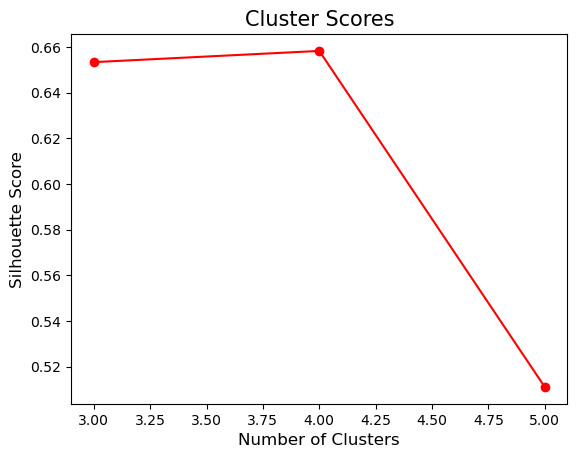

In [ ]:
# Line plot of silhouette score for best K
plt.plot(n_clusters, silhouette_scores, color = 'r', marker = 'o')
plt.title('Cluster Scores', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Silhouette Score', fontsize = 12)
plt.show()

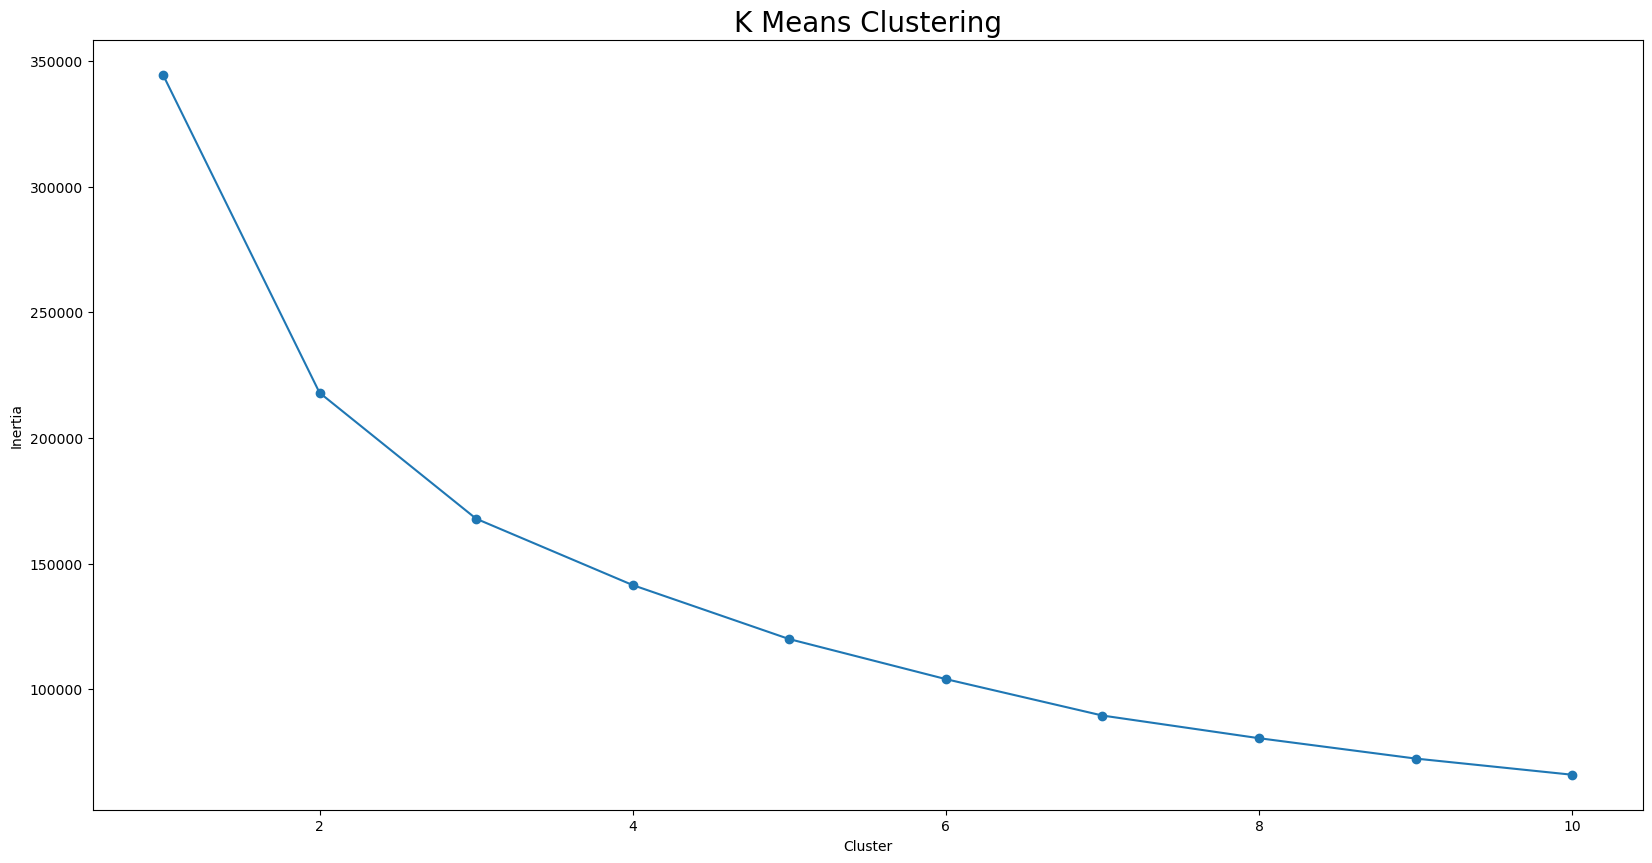

In [ ]:
# Elbow method for finding best K
iner = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 15)
    kmeans.fit(df_scaled)
    iner.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1, 11), iner, marker ="o")
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

Setelah dilihat best K-nya, saya akan membagi data menjadi 3 cluster.

In [ ]:
# Final clustering model
final_model = KMeans(n_clusters = 3, random_state = 2023)
final_model.fit(df_scaled)

KMeans(n_clusters=3, random_state=2023)

In [ ]:
# Combine clustering result and df_all dataframe
df_output = df_all.copy()
df_output['Cluster'] = final_model.labels_
df_output.sample(5)

,order_id,product_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,Cluster
101006,e0b42130d37ff0c40d83a9dee30d2519,542ad0ab955876d25ddf09684a3b3c5e,34.90,11.85,credit_card,2.0,46.75,aa4bcebd775c8d70e2dec7bb5a949d53,delivered,2018-02-09 23:00:26,...,2018-03-05 00:00:00,5.0,b3c9c2da8dc18956347a46c7e61321f5,11920,iguape,SP,8541,ferraz de vasconcelos,SP,1
68933,9a3956da42c0f49603a35e901b6e1fab,cddf971ea646c184a153eb3899113d5e,20.70,10.96,boleto,1.0,31.66,621924fa61a8414c52e2bac7d2c036b9,delivered,2017-02-06 20:54:37,...,2017-03-01 00:00:00,4.0,7d9fabf002742f2309860e9351b6a863,88950,jacinto machado,SC,89120,timbo,SC,1
49642,6e4136c5ace9e2c496768e5f6e97abe5,aba86c093ccdbac75b09111d57e50004,119.60,38.36,boleto,1.0,315.92,76e74ccff5d76c6405eb8bb84e38bf1b,delivered,2017-06-18 16:14:06,...,2017-07-27 00:00:00,3.0,ff8d5a4820b9e8b59cdbc2f6102e64e4,45890,pau brasil,BA,8577,itaquaquecetuba,SP,0
104819,e9740abcb66dbd659a343d7fbf2af04f,794bf14b91dcd92fd3cd35a45d6a83e4,38.40,17.78,credit_card,1.0,56.18,bfbf277426eaeed47c31c9cef7fa29d9,delivered,2017-02-02 09:39:45,...,2017-03-17 00:00:00,5.0,511a6ac6371fbba3bad465f3a7b0fc30,38200,frutal,MG,89120,timbo,SC,1
42930,5f944775bd47e27388f34caaac31649a,e9def91e99c8ecb7c5cef5e31506a056,69.99,12.83,boleto,1.0,82.82,d44f8f91948d0fce5a34a2fe6c7d27c5,delivered,2017-12-07 16:32:47,...,2018-01-09 00:00:00,5.0,d530319610a3b39505027578c3d3d5f1,18230,sao miguel arcanjo,SP,4367,sao paulo,SP,1


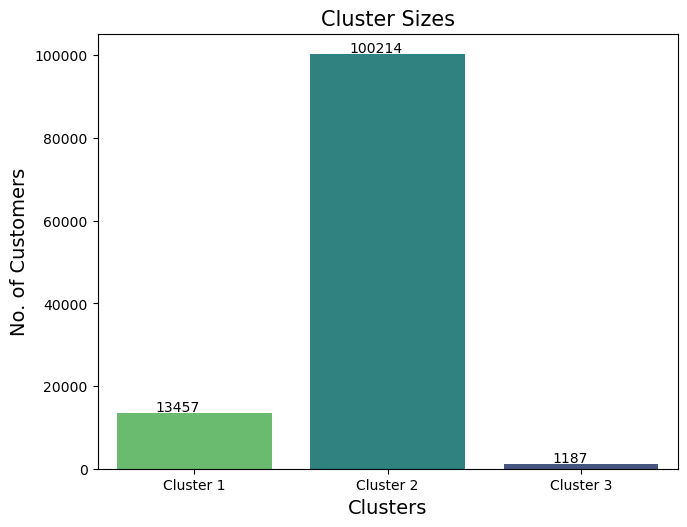

In [ ]:
# See cluster sizes
sns.countplot(data = df_output, x = 'Cluster', palette = 'viridis_r')
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('No. of Customers', fontsize = 14)
plt.xticks([0, 1, 2], ['Cluster 1', 'Cluster 2', 'Cluster 3'], rotation = 0)
plt.text(x = 0 - 0.2, y = df_output.Cluster.value_counts()[0] + 500, s = df_output.Cluster.value_counts()[0])
plt.text(x = 1 - 0.2, y = df_output.Cluster.value_counts()[1] + 500, s = df_output.Cluster.value_counts()[1])
plt.text(x = 2 - 0.15, y = df_output.Cluster.value_counts()[2] + 500, s = df_output.Cluster.value_counts()[2])
plt.tight_layout(pad = -1)
plt.show()

Setelah dilakukan clustering, data ini terbagi menjadi 3 cluster. Cluster 1 berisi 13.457 data, cluster 2 berisi 100.214 data, dan cluster 3 berisi 1.187 data.

Untuk melihat clustering dari setiap cluster, perlu dibuat visualisasi dengan bantuan PCA. 

In [ ]:
# Import library for clustering visualization
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(x_pca, df_output['Cluster'])
df_pca.reset_index(inplace=True)
df_pca

,Cluster,0,1
0,1,-0.643988,0.135855
1,1,0.622419,0.322766
2,1,0.318119,0.311100
3,1,-0.926832,0.023752
4,1,0.332096,0.299083
...,...,...,...
114853,0,1.732320,-0.777465
114854,0,1.799816,-0.249743
114855,1,-0.287257,0.060417
114856,1,-0.808987,0.376676


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


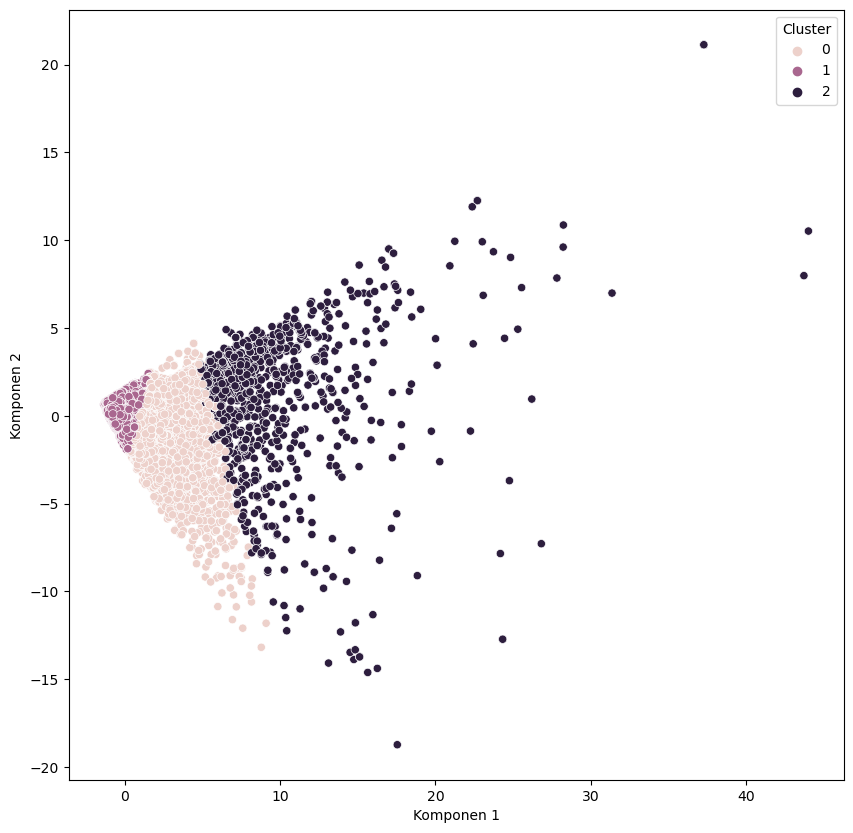

In [ ]:
# Plotting visualization
plt.figure(figsize=(10,10))
sns.scatterplot(
    x_pca[:,0],
    x_pca[:,1],
    hue= df_pca['Cluster']
)

plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')

plt.show()

Berikut ini adalah hasil clustering dari data yang saya punya.

<AxesSubplot:xlabel='price', ylabel='freight_value'>

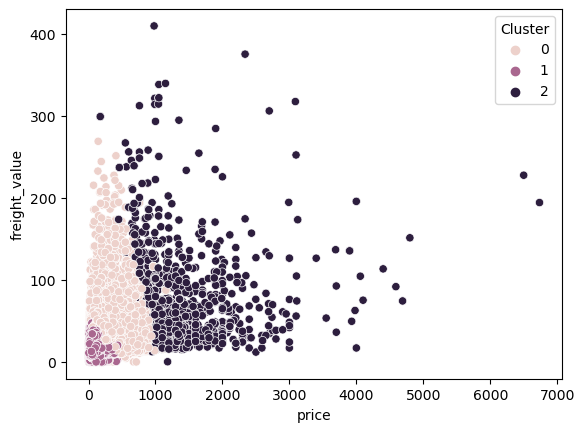

In [1008]:
# Make scatter plot to see relationship of the price and freight value
sns.scatterplot(data=df_output, x=df_output['price'], y=df_output['freight_value'], hue='Cluster')

Dengan melihat scatter plot di atas dapat dilihat bahwa cluster 1 memiliki buying power rendah ke sedang dengan frekuensi yang jarang. Cluster 2 memiliiki buying power rendah ke sedang dengan frekuensi yang tinggi (sering melakukan transaksi). Dan cluster 2 memiliki buying power yang tinggi dengan frekuensi yang rendah (jarang melakukan transaksi)

<AxesSubplot:xlabel='price', ylabel='review_score'>

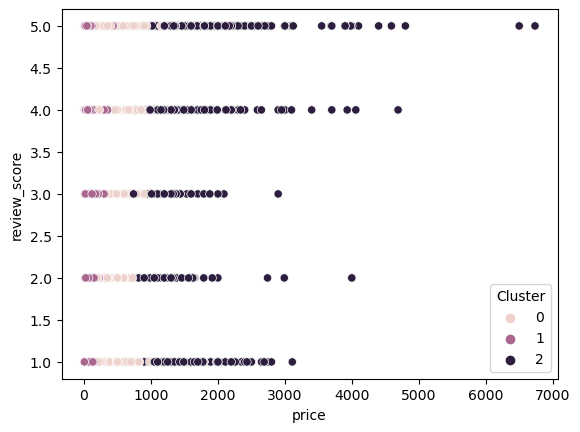

In [996]:
sns.scatterplot(data=df_output, x=df_output['price'], y=df_output['review_score'], hue='Cluster')

In [1010]:
df_output[df_output['Cluster'] == 0]

,order_id,product_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,Cluster
7,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,810.00,70.75,credit_card,10.0,880.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,...,2018-07-25 00:00:00,5.0,fda4476abb6307ab3c415b7e6d026526,11702,praia grande,SP,19010,presidente prudente,SP,0
16,0009c9a17f916a706d71784483a5d643,3f27ac8e699df3d300ec4a5d8c5cf0b2,639.00,11.34,credit_card,6.0,650.34,8a250edc40ebc5c3940ebc940f16a7eb,delivered,2018-04-25 09:10:41,...,2018-05-09 00:00:00,4.0,6062db572f3ef38b7a8ff4307abbfad3,13044,campinas,SP,7032,guarulhos,SP,0
22,000f25f4d72195062c040b12dce9a18a,1c05e0964302b6cf68ca0d15f326c6ba,119.99,44.40,credit_card,1.0,164.39,86ade8ebc14f18dd6c3ea75bd0eb7534,delivered,2018-03-07 10:33:13,...,2018-04-11 00:00:00,4.0,1a6cbc34ea404cb0af7ed74df0999354,27213,volta redonda,RJ,8577,itaquaquecetuba,SP,0
26,0011d82c4b53e22e84023405fb467e57,c389f712c4b4510bc997cee93e8b1a28,289.00,26.33,credit_card,2.0,315.33,2013d892495e1a101d742d533d2d1119,delivered,2018-01-16 21:43:23,...,2018-02-15 00:00:00,4.0,02daaa0e021d624d1784c4ea5cc84ace,1033,sao paulo,SP,13930,serra negra,SP,0
30,00137e170939bba5a3134e2386413108,672e757f331900b9deea127a2a7b79fd,397.00,24.65,boleto,1.0,421.65,7b63cba66b8e6d002e94d0990c1e2868,delivered,2017-11-24 16:50:38,...,2017-12-18 00:00:00,4.0,38c3bc2d6df03905e3e8d3d5b079acf4,22790,rio de janeiro,RJ,82810,curitiba,PR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114842,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,180.00,48.14,credit_card,4.0,456.28,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,...,2018-04-19 00:00:00,5.0,028c09f007292c4e3a3b10d296e47987,58075,joao pessoa,PB,12327,jacarei,SP,0
114843,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,180.00,48.14,credit_card,4.0,456.28,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,...,2018-04-19 00:00:00,5.0,028c09f007292c4e3a3b10d296e47987,58075,joao pessoa,PB,12327,jacarei,SP,0
114845,fffa82886406ccf10c7b4e35c4ff2788,bbe7651fef80287a816ead73f065fc4b,229.90,44.02,credit_card,7.0,273.92,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,...,2018-01-24 00:00:00,4.0,2a3ab9bf9639491997586882c502540a,59955,tenente ananias,RN,5141,pirituba,SP,0
114853,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,boleto,1.0,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,2018-05-18 00:00:00,5.0,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,88303,itajai,SC,0


In [1051]:
df_output[df_output['Cluster'] == 1]

,order_id,product_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,Cluster
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29 00:00:00,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15 00:00:00,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-02-05 00:00:00,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-20 00:00:00,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-17 00:00:00,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114851,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,55.00,34.19,boleto,1.0,356.76,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,...,2017-11-27 00:00:00,4.0,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,24440,sao goncalo,RJ,1
114852,fffbee3b5462987e66fb49b1c5411df2,6f0169f259bb0ff432bfff7d829b9946,119.85,20.03,credit_card,3.0,139.88,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,...,2018-07-23 00:00:00,5.0,ecc3d4eb9b17d2f0865d21f2abecc51c,39401,montes claros,MG,13321,salto,SP,1
114855,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,credit_card,3.0,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,2017-11-10 00:00:00,5.0,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR,1
114856,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,credit_card,3.0,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,2017-08-25 00:00:00,5.0,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,4733,sao paulo,SP,1


In [1052]:
df_output[df_output['Cluster'] == 2]

,order_id,product_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,Cluster
329,00c9474e0334f7a4ffc8c3a8bd21a51e,4b2653088591de362e6ba85b4a474c75,1050.61,25.13,credit_card,10.0,1075.74,e84d9c0fb40fccf1b0e326e840f6a8ec,delivered,2018-05-04 19:19:10,...,2018-05-17 00:00:00,1.0,1ff3cb11d59e1782c6fc95912849a62d,13150,cosmopolis,SP,1201,sao paulo,SP,2
528,012f2c4ca09b101a73e18957c3294cd6,a9e9edb1bcac585bfbfa381ce40e5d99,1820.00,81.62,credit_card,10.0,1901.62,ddffe99936ec5bf99f1ea9ad22fde3eb,delivered,2017-05-07 22:23:30,...,2017-05-31 00:00:00,5.0,9df040be9d7656d4c912b62472bfcf05,8710,mogi das cruzes,SP,87140,paincandu,PR,2
704,01a0013ddc7cd129e350e8671b56a263,152397b614be35e54106663bd5671f7d,579.00,24.50,credit_card,10.0,1810.50,800631fef0a782c3a8efe7d8071df64a,delivered,2017-03-23 19:47:34,...,2017-04-25 00:00:00,4.0,6d3c02f03efc71b44d52999fc95fc86e,75200,pires do rio,GO,88090,florianopolis,SC,2
705,01a0013ddc7cd129e350e8671b56a263,152397b614be35e54106663bd5671f7d,579.00,24.50,credit_card,10.0,1810.50,800631fef0a782c3a8efe7d8071df64a,delivered,2017-03-23 19:47:34,...,2017-04-25 00:00:00,4.0,6d3c02f03efc71b44d52999fc95fc86e,75200,pires do rio,GO,88090,florianopolis,SC,2
706,01a0013ddc7cd129e350e8671b56a263,152397b614be35e54106663bd5671f7d,579.00,24.50,credit_card,10.0,1810.50,800631fef0a782c3a8efe7d8071df64a,delivered,2017-03-23 19:47:34,...,2017-04-25 00:00:00,4.0,6d3c02f03efc71b44d52999fc95fc86e,75200,pires do rio,GO,88090,florianopolis,SC,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114015,fe1b32a1829b1ddd26415d31fbf85b78,6a02077065f9af692480ab01fbff66d2,1199.00,15.65,credit_card,8.0,1214.65,d3fa2b41958a719ae19f1b4daeed98cb,delivered,2018-07-05 00:40:06,...,2018-07-26 00:00:00,3.0,ed9d56556693e0497814d1ff8607179d,4144,sao paulo,SP,5705,sao paulo,SP,2
114110,fe579bd413f722e51bc98182441e135c,4aa52adb5489aa151e17023d4e153297,1878.33,102.38,credit_card,10.0,1980.71,fc60ab8252b98a6e60c51672d7853c7e,delivered,2017-05-10 17:04:35,...,2017-06-01 00:00:00,3.0,8637975a0cb5150b10528f5697511668,95030,caxias do sul,RS,13419,piracicaba,SP,2
114189,fe8019fe8dd1f1af8ba5c0ffdb113a74,87feb07adc221a4c6cdf051ea1afd0ff,2110.00,43.35,credit_card,10.0,2153.35,c9fca216d2d1ece33dbddf9fa36eaa9a,delivered,2018-05-04 16:32:19,...,2018-05-23 00:00:00,5.0,445e36c0849ad359c7b6d99786c3357c,24370,niteroi,RJ,25963,teresopolis,RJ,2
114256,fea759da1fbb4566e226c7bb2c257a5e,25c38557cf793876c5abdd5931f922db,987.00,32.99,credit_card,6.0,1019.99,c6f8c11c9f6efe1a3d4f9e5e65d1e01a,delivered,2018-04-01 19:42:09,...,2018-04-20 00:00:00,4.0,4ba684652def961d0506bf2409bfa1f5,35057,governador valadares,MG,13450,santa barbara d´oeste,SP,2


In [1047]:
(df_output[df_output['Cluster'] ==0]['payment_type'].value_counts(normalize=True))

credit_card    0.770008
boleto         0.180575
voucher        0.038419
debit_card     0.010998
Name: payment_type, dtype: float64

In [1048]:
(df_output[df_output['Cluster'] ==1]['payment_type'].value_counts(normalize=True))

credit_card    0.732602
boleto         0.196679
voucher        0.055841
debit_card     0.014878
Name: payment_type, dtype: float64

In [1050]:
(df_output[df_output['Cluster'] ==2]['payment_type'].value_counts(normalize=True))

credit_card    0.802864
boleto         0.165965
voucher        0.018534
debit_card     0.012637
Name: payment_type, dtype: float64

### **Summary and Recommendation**

#### Summary

1. Olist dapat dikatakan sebagai the biggest ecommerce in Brazil. Hal ini disebabkan karena pelayanan yang diberikan sangat baik, dengan melihat jumlah review score 1-3 yang sedikit, metode pembayaran yang beragam , dan juga tingkat keterlambatan pengiriman paket hanya 8%.
2. Banyak konsumen yang membeli produk lewat Olist tidak menuliskan review. Ada 58% yang tidak menuliskan review message, dan ada 88% yang tidak menuliskan review title.
3. Ada 73% orang di Brazil yang berbelanja di Olist dan membayar dengan menggunakan credit card.
4. Data ini dapat dibagi menjadi 3 cluster :
    
    - Cluster 1 : cluster yang memberikan rating rendah, buying power rendah ke sedang, frekuensi order sedang
    - Cluster 2 : cluster yang memberikan rating sedang, buying power rendah ke sedang, frekuensi order sering
    - Cluster 3 : cluster yang memberikan rating tinggi, buying power besar, frekuensi order jarang

### Recommendation

1. Rekomendasi untuk cluster 1 : dikarenakan frekuensi order yang average, maka perlu dilakukan peningkatan pelayanan dari tiap merchant. Hal yang bisa dilakukan di luar hal-hal yang ada pada dataset adalah membalas chat konsumen dengan sopan dan baik, melakukan persiapan pengiriman yang baik dan memperhatikan kualitas produknya, atau memberikan diskon atau bundling dari pihak merchant Olist. Sehingga rating yang menunjukkan ketidakpuasan akan semakin sedikit.

2. Rekomendasi untuk cluster 2 : perlu melakukan sedikit peningkatan layanan merchant Olist dengan memberi perhatian lebih untuk pihak logistik yang dipilih, packaging saat pengiriman juga perlu diperhatikan agar barang tetap aman sampai tujuan, dan masih banyak hal-hal yang mungkin bisa meningkatkan rating score yang diberikan.

3. Rekomendasi untuk cluster 3 : dikarenakan frekuensi order yang jarang, maka perlu adanya diskon atau bundling yang diberikan utnuk kelompok cluster ini, sehingga dapat meningkatkan frekuensi order. Karena rating yang diberikan sudah tinggi, maka layanan merchant perlu dipertahankan, sehingga bisa tetap mendapatkan nilai review yang memuaskan.